# Analyzing the Impact of Payment Methods on Taxi Fare Revenue


This notebook represents the **second part of our NYC Yellow Taxi Fare Prediction project**. While the first part focused on building a machine learning model to predict taxi fare amounts based on trip attributes, **this phase shifts attention to a deeper revenue analysis—specifically examining how payment methods (e.g., cash vs. credit card) influence fare and total earnings.** To keep the workflow organized and modular, this analysis is conducted in a separate notebook, allowing us to focus exclusively on the financial implications of payment choices and their potential impact on driver revenue and rider behavior.

In today’s fast-paced taxi environment, optimizing revenue streams is essential for long-term sustainability. Our central goal is to explore whether certain payment types lead to higher total fare amounts and whether behavioral nudges can guide customers toward more profitable options—without negatively affecting their experience. This notebook outlines the problem statement, defines the research question, summarizes the data, explains the methodology, presents analytical insights, performs hypothesis testing, and ends with data-backed recommendations.

## Problem Statement

**"Analyze the relationship between payment methods and fare revenue, exploring whether certain payment types lead to higher earnings for drivers and whether behavioral nudges can be applied to influence payment method choice — without harming customer satisfaction."** <br>

## Research Question 

**Revenue Optimization Focus**  <br>
   "Does the payment method (e.g., cash vs. credit card) influence the fare or total amount paid?"<br>

   "Can we recommend a preferred payment method that increases revenue for drivers without negatively impacting customer experience?"<br>



## Data Loading

In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [715]:
df = pd.read_csv('/Users/harshbajpai/Projects/NYC Taxi Fare Prediction/yellow_tripdata_2020-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [716]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


# Exploratory Data Analysis

In [718]:
# row and columns of dataset
df.shape

(6405008, 18)

In [719]:
# Calculating duration from the pickup and dropoff datetime in minutes

# converting pickup and dropoff to datetime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# subtracting the pickup time from dropoff time to get duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# converting into minutes
df['duration'] = df['duration'].dt.total_seconds()/60

In [720]:
# datatypes of data
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

The original dataset contains numerous columns, but many of them are not relevant to our current objective. Since our focus in this phase of the project is on analyzing the relationship between payment type and fare amount, we will streamline the dataset by selecting only the variables essential for this analysis.

As outlined in the problem statement, we are interested in identifying whether payment method affects fare amount. Therefore, we retain only the following key features: passenger_count, trip_distance, trip_duration, payment_type, and fare_amount. These features will help us understand the key drivers of fare variation in the context of different payment methods, while removing unnecessary noise from the analysis.

In [722]:
# dropping unwanted columns
df.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [723]:
# filtered data with relevant columns essential for the analysis
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [724]:
# checking for missing values
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [725]:
# percentage of missing data to the total record of the data
print('Missing data %',round(65441/df.shape[0]*100,2))

Missing data % 1.02


In [726]:
# as the data has only 1% of data missing, we can simply drop the records with missing values.
df.dropna(inplace = True)

In [727]:
# changing the passenger count and payment type data type to integer as they are present in float
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [728]:
# checking for the duplicate rows 
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [729]:
# removing duplicate rows as they will not contribute in analysis 
df.drop_duplicates(inplace = True)

In [730]:
# after removing missing values and duplicate rows, we are left with following rows and columns
df.shape

(3007861, 5)

In [731]:
# passenger count distribution
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [732]:
# payment type distribution
df['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

In this analysis, we will focus exclusively on the two most common payment methods: **credit card and cash**, which are encoded as 1 and 2 in the dataset, respectively. To keep the analysis targeted and meaningful, we will exclude all other payment types such as "No Charge", "Dispute", or "Unknown", as they either occur infrequently or do not reflect standard transactions.

Additionally, an inspection of the passenger count distribution reveals that trips with more than 5 passengers are rare, and trips with 0 passengers are invalid—since at least one passenger is needed to pay the fare. Therefore, we will further filter the data to include only trips with 1 to 5 passengers, ensuring that our dataset reflects realistic and common taxi ride scenarios.

In [734]:
# filtering for payment type 1 and 2
df = df[df['payment_type']<3]

# filtering for passenger count from 1 to 2
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [735]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [736]:
# descriptive statistics for data
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


Upon reviewing the descriptive statistics of the dataset, it becomes evident that the minimum values for key features such as trip distance, fare amount, and trip duration are negative. These values are logically invalid and unrealistic for NYC taxi rides. Therefore, we will remove all records that contain negative values, as they can distort the analysis and introduce bias.

Moreover, by comparing the maximum values against the median (50th percentile), it is clear that the dataset likely contains significant outliers, especially extremely high values. To ensure the integrity and reliability of our insights, these outliers will be identified and removed using reasonable upper thresholds.

In [738]:
# filtering the records for only positive values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

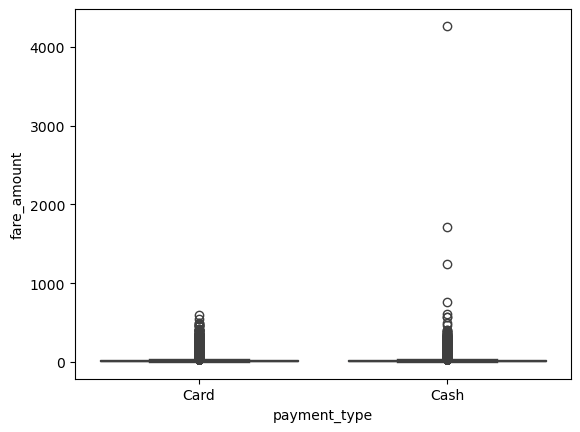

In [739]:
# checking for the outliers
sns.boxplot(data=df, y="fare_amount", x="payment_type")
plt.show()

In [740]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


We are interested in exploring the relationship between **payment type and passenger behavior**, specifically in the context of trip **distance and fare amount**. Are there noticeable patterns or variations in how different payment methods (cash vs. card) are distributed across various fare ranges or trip lengths?

To investigate this, we will create histograms to visualize how passenger counts and fare amounts are distributed across payment methods. This will help uncover any underlying behavioral trends and provide stakeholders with insights into fare ranges commonly associated with each payment type.


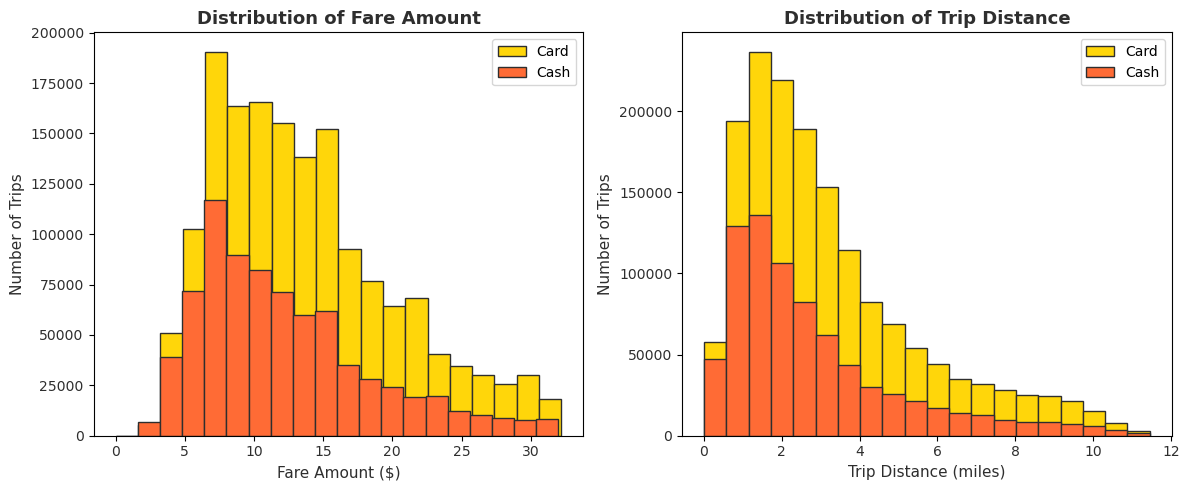

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

In [742]:
plt.figure(figsize=(12, 5))

# Yellow Taxi Theme Colors
card_color = '#FFD60A'        # Card
cash_color = '#FF6B35'        # Cash
edge_color = '#2E2E2E'        # Asphalt Black

# Plot 1: Fare Amount Distribution 
plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount', fontsize=13, color=edge_color, fontweight = 'bold')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], 
         histtype='barstacked', bins=20, edgecolor=edge_color, 
         color=card_color, label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], 
         histtype='barstacked', bins=20, edgecolor=edge_color, 
         color=cash_color, label='Cash')
plt.xlabel('Fare Amount ($)', fontsize=11, color=edge_color)
plt.ylabel('Number of Trips', fontsize=11, color=edge_color)
plt.xticks(color=edge_color)
plt.yticks(color=edge_color)
plt.legend()

# Plot 2: Trip Distance Distribution 
plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance', fontsize=13, color=edge_color, fontweight = 'bold')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], 
         histtype='barstacked', bins=20, edgecolor=edge_color, 
         color=card_color, label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], 
         histtype='barstacked', bins=20, edgecolor=edge_color, 
         color=cash_color, label='Cash')
plt.xlabel('Trip Distance (miles)', fontsize=11, color=edge_color)
plt.ylabel('Number of Trips', fontsize=11, color=edge_color)
plt.xticks(color=edge_color)
plt.yticks(color=edge_color)
plt.legend()

plt.tight_layout()
plt.show()

# calculating the mean and standard deviation group by on payment type 
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

To examine passenger preferences regarding payment methods, we will assess the proportion of rides paid via card versus cash. A pie chart will be used to visually represent this distribution, offering a simple yet effective overview of how frequently each payment method is chosen. 

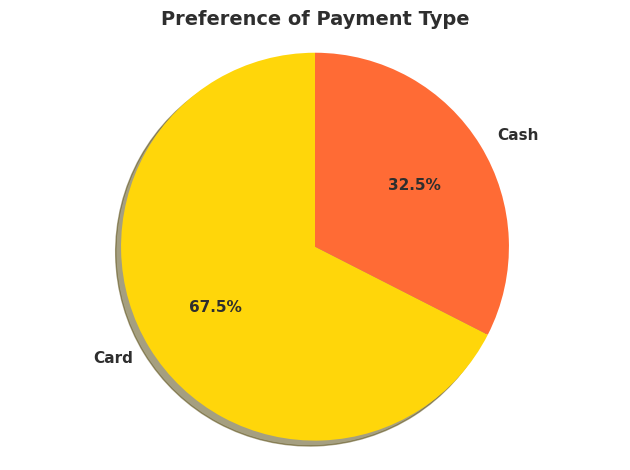

In [744]:
# Yellow theme
theme_colors = {
    'Card': '#FFD60A',       # NYC Yellow
    'Cash': '#FF6B35'        # Rush Hour Orange
}

# Plotting pie chart
plt.title('Preference of Payment Type', fontweight='bold', fontsize=14, color='#2E2E2E')

payment_counts = df['payment_type'].value_counts(normalize=True)
labels = payment_counts.index
sizes = payment_counts.values
colors = [theme_colors[label] for label in labels]

plt.pie(
    sizes,
    labels=labels,
    startangle=90,
    shadow=True,
    autopct='%1.1f%%',
    colors=colors,
    textprops={'color': '#2E2E2E', 'fontsize': 11, 'fontweight':'bold'}
)

plt.axis('equal') 
plt.tight_layout()
plt.show()


Subsequently, **we aim to analyze how payment method preferences vary with the number of passengers in the cab.** The objective is to investigate whether the choice of payment type changes depending on how many people are traveling in a single ride.

To facilitate this exploration, we employ a stacked bar chart, which is particularly useful for comparing the proportional distribution of payment methods across different passenger counts. This visual representation helps uncover any potential patterns or behavioral trends, offering insights into whether payment preferences shift with group size.

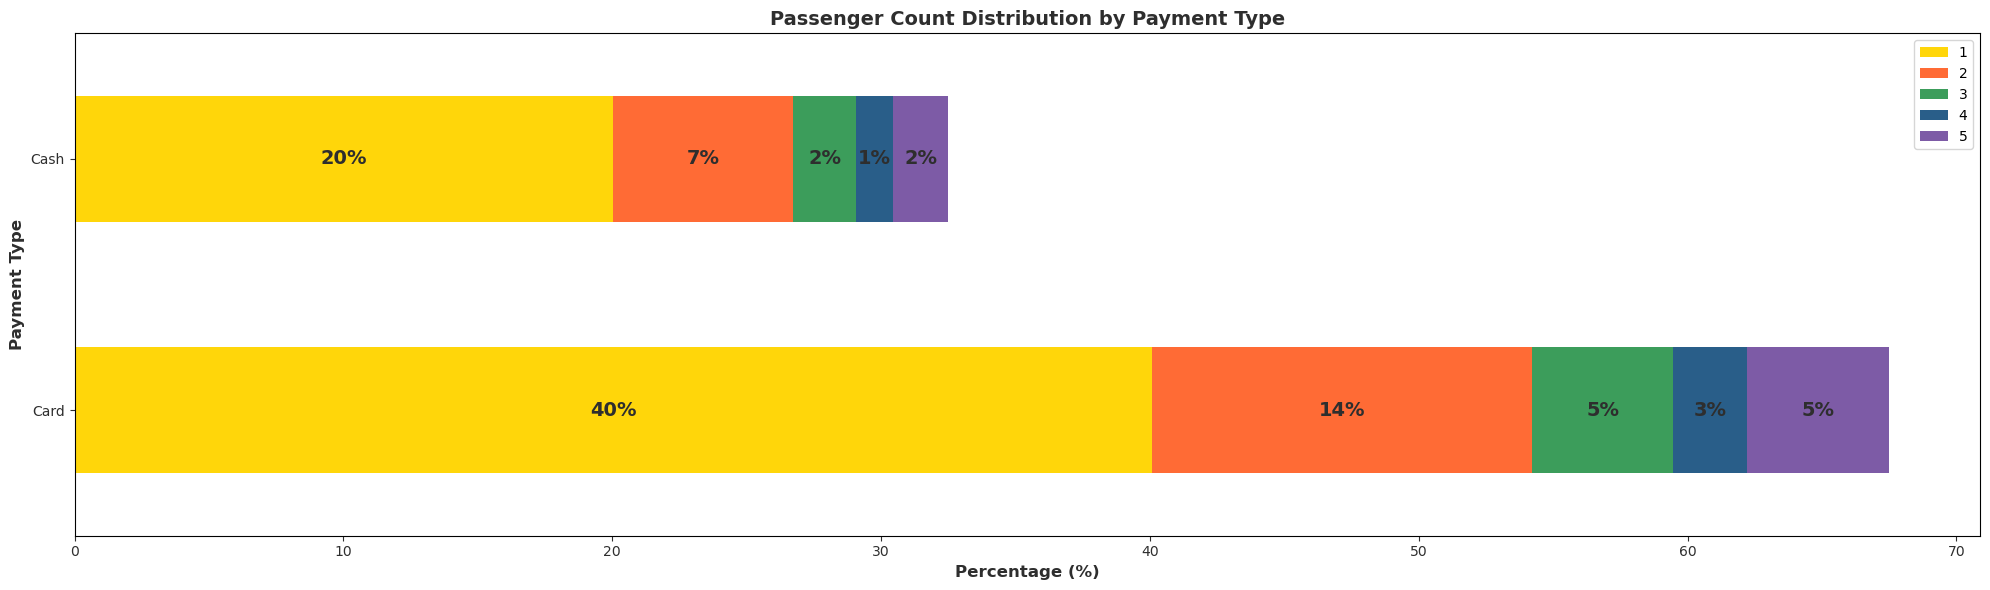

In [746]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# calculating the percentage of each passenger count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

# use a new DataFrame to store the visualization structure
plot_df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
plot_df['payment_type'] = ['Card', 'Cash']
plot_df.iloc[0, 1:] = passenger_count.iloc[0:5, -1].values  # Card percentages
plot_df.iloc[1, 1:] = passenger_count.iloc[5:10, -1].values  # Cash percentages

# NYC Yellow Taxi theme colors
colors = ['#FFD60A', '#FF6B35', '#3C9D5B', '#295E89', '#7D5BA6']  # 1 to 5 passengers

# plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 6))
plot_df.plot(x='payment_type', kind='barh', stacked=True, title='', ax=ax, color=colors)

# custom title and labels
ax.set_title('Passenger Count Distribution by Payment Type', fontsize=14, fontweight='bold', color='#2E2E2E')
ax.set_xlabel('Percentage (%)', fontsize=12, color='#2E2E2E', fontweight = 'bold')
ax.set_ylabel('Payment Type', fontsize=12, color='#2E2E2E', fontweight='bold')
ax.tick_params(axis='x', colors='#2E2E2E')
ax.tick_params(axis='y', colors='#2E2E2E')

# add percentage text on each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if width > 1:
        ax.text(x + width / 2, y + height / 2,
                '{:.0f}%'.format(width),
                ha='center', va='center',
                fontsize=14, fontweight='bold', color='#2E2E2E')

plt.tight_layout()
plt.show()



## Hypothesis Testing

To select the most appropriate statistical test for our scenario, the first step is to evaluate whether the fare amount distribution follows a normal distribution. Although the earlier histogram suggests it may not, we will verify this more formally using a **Quantile–Quantile (QQ) plot.**

QQ plots allow us to visually assess whether the distribution of fare amounts for each payment type is approximately normal. If the plotted data points lie roughly along the diagonal reference line, it indicates that the distribution is close to normal. Deviations from the line suggest skewness, kurtosis, or other non-normal behavior—helping us determine if parametric tests are appropriate for further analysis.

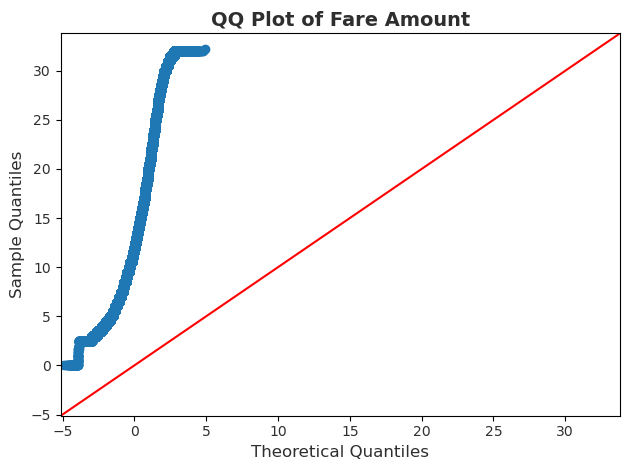

In [749]:
# creating Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['fare_amount'], line='45')
plt.title('QQ Plot of Fare Amount', fontsize=14, fontweight='bold', color='#2E2E2E')
plt.xlabel('Theoretical Quantiles', fontsize=12, color='#2E2E2E')
plt.ylabel('Sample Quantiles', fontsize=12, color='#2E2E2E')
plt.xticks(color='#2E2E2E')
plt.yticks(color='#2E2E2E')
plt.tight_layout()
plt.show()

From the QQ plot above, it's clear that the data points don’t follow the red 45-degree line — which means the fare amounts are not normally distributed. This rules out the use of a Z-test, since it assumes normality and requires population standard deviation, which we don’t have.

Instead, we'll go with a T-test, which is a better fit for our situation. It works well even when the data isn’t perfectly normal, and it doesn't need the population standard deviation — just the sample. Since we’re comparing the average fare amounts between two independent groups (card vs. cash payments), the independent two-sample T-test is the right choice here.

This is especially useful for our analysis of NYC Yellow Taxi records, where we’re dealing with a large sample and unknown population parameters. The T-test gives us a practical way to check if there’s any meaningful difference in fares based on the payment method.

**Null Hypothesis (H₀): The average fare amount is the same for both card and cash payments.**

**Alternative Hypothesis (H₁): The average fare amount is different between card and cash payments.**



In [751]:
# Sample 1
credit_card = df[df['payment_type'] == 'Card']['fare_amount']

# Sample 2
cash = df[df['payment_type'] == 'Cash']['fare_amount']

#performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var = False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 165.59915491544626, P-value: 0.0

Reject the null hypothesis


Since the p-value is far smaller than 0.05, we reject the null hypothesis.
<br>
<br>
This means there's a statistically significant difference in the average fare amounts between rides paid by credit card and paid in cash.
<br>
<br>
From a business perspective, this insight is important:<br>
**Encouraging customers to pay with credit cards may lead to higher average fares, and in turn, generate more revenue for taxi drivers and fleet operators.**